<a href="https://colab.research.google.com/github/Kibuye24/Model-Predicting-Hypothyroidism/blob/main/Model_Predicting_If_a_Patient_Has_Hypothyoroidism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Predicting If a Patient Has Hypothyoroid

## 1. Defining the Question

### a) Specifying the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success

Achieve an Accuracy above 85%

### c) Understanding the context 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Using the data, we can determine whether a patient has hypothyroidism.

### d) Recording the Experimental Design

* Lding & Viewing the Data
* Dataleaning
* Eploatory Data Analysis:
* Feature Selection
* Modelling
* Hyperparameter Tuning
* Challenging the Solution
* Conclusion

### e) Data Relevance

Dataset link: http://bit.ly/hypothyroid_data

## 2. Reading the Data

In [1]:
#Loading our libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
df = pd.read_csv('hypothyroid.csv')

## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
df.shape

(3163, 26)

There are 26 variables and 3163 records

In [4]:
# Previewing the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
# Previewing the bottom of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Checking whether each column has an appropriate datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

Numerical values have been placed as objects instead of floats and integers. We will handle this in data cleaning.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Tidying the Dataset

In [7]:
#Introducing null vales
#When looking at the dataset, the null values are denoted as a '?'. We will replace them to be null values
df.replace(['?'], np.nan, inplace=True)

In [8]:
#Correcting the datatypes 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']

for i in numerical_columns:
    df[i]= pd.to_numeric(df[i])

This changes the datatype to numerical of the selected columns. Classified into  floats

In [9]:
# Identifying the Missing Data
df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [10]:
# Dealing with the Missing Data
#We will drop the column TBG as it has a large number of null values
df.drop(columns=['TBG'], inplace=True)

In [11]:
#The null values in the sex column aren't a large percentage of the dataset. We will drop the null values 
df.dropna(subset=['sex'], inplace=True)

In [12]:
# Filling the missing values in the other numerical columns with mean
nullified_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI']
for i in nullified_columns:
    df[i]= df[i].fillna(df[i].mean(), axis = 0)

In [13]:
df.isna().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

There are no null values in the dataset

In [14]:
# Checking for duplicate values
df.duplicated().sum()

152

There are 152 duplicates. We will drop them all.

In [15]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

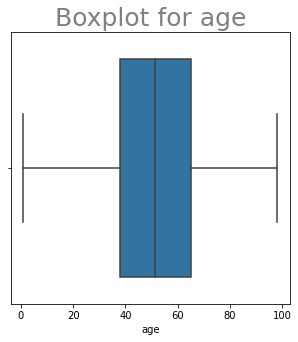

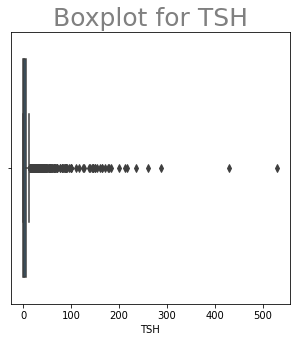

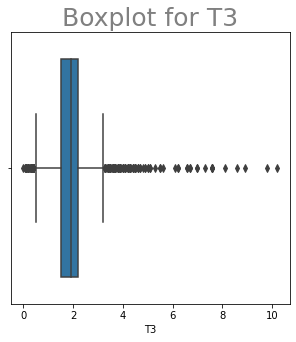

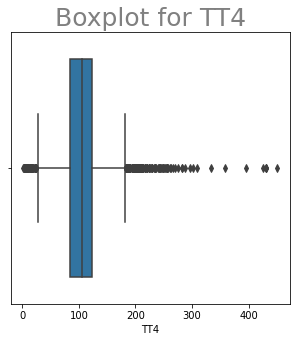

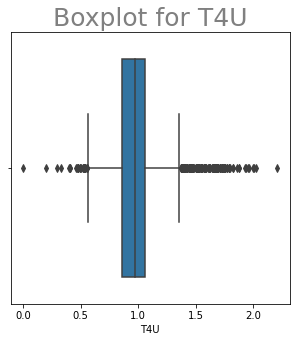

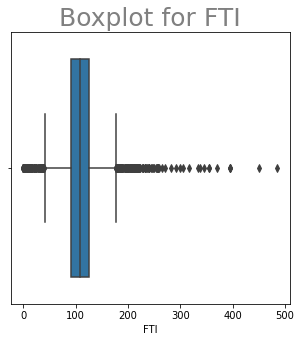

In [16]:
for i in nullified_columns:
    fig = plt.figure(figsize = (5,5))
    sns.boxplot(df[i])
    plt.title('Boxplot for ' + i, size = 25, color = 'grey')
            
plt.show()

There are outliers in the dataset. However, we will not drop them as they are true values.

In [17]:
# Checking for Anomalies
for i in df.columns:
    u = df[i].unique()
    print('Unique values of ', i , 'is' , u)

Unique values of  status is ['hypothyroid' 'negative']
Unique values of  age is [72.   15.   24.   77.   85.   64.   20.   42.   69.   75.   53.   59.
 68.   50.   78.   65.   28.   43.   40.   84.   51.22 83.   63.   73.
 36.   27.   48.   71.   60.   34.   79.   62.   74.   32.   41.   70.
 29.    5.   58.   35.   51.   22.   16.   44.   39.   47.   18.   17.
 88.   56.   30.   45.   66.   52.   54.   80.   33.   38.   92.   67.
 46.   13.   89.   61.   49.   26.   57.   31.   90.   81.   25.   37.
 76.   87.   23.   55.   86.   98.   21.   97.    1.    6.   14.   82.
 11.   19.    9.   12.   10.    8.    7.    4.   93.  ]
Unique values of  sex is ['M' 'F']
Unique values of  on_thyroxine is ['f' 't']
Unique values of  query_on_thyroxine is ['f' 't']
Unique values of  on_antithyroid_medication is ['f' 't']
Unique values of  thyroid_surgery is ['f' 't']
Unique values of  query_hypothyroid is ['f' 't']
Unique values of  query_hyperthyroid is ['f' 't']
Unique values of  pregnant is ['f' 

As we used mean to fill the null. An anomaly occurs in the age column as we have a float value. We will correct that.

In [18]:
#Making the age column integers
df['age'] = round(df['age'])
df['age'].unique()

array([72., 15., 24., 77., 85., 64., 20., 42., 69., 75., 53., 59., 68.,
       50., 78., 65., 28., 43., 40., 84., 51., 83., 63., 73., 36., 27.,
       48., 71., 60., 34., 79., 62., 74., 32., 41., 70., 29.,  5., 58.,
       35., 22., 16., 44., 39., 47., 18., 17., 88., 56., 30., 45., 66.,
       52., 54., 80., 33., 38., 92., 67., 46., 13., 89., 61., 49., 26.,
       57., 31., 90., 81., 25., 37., 76., 87., 23., 55., 86., 98., 21.,
       97.,  1.,  6., 14., 82., 11., 19.,  9., 12., 10.,  8.,  7.,  4.,
       93.])

## 6. Exploratory Analysis

### 6.1  Univariate Analysis

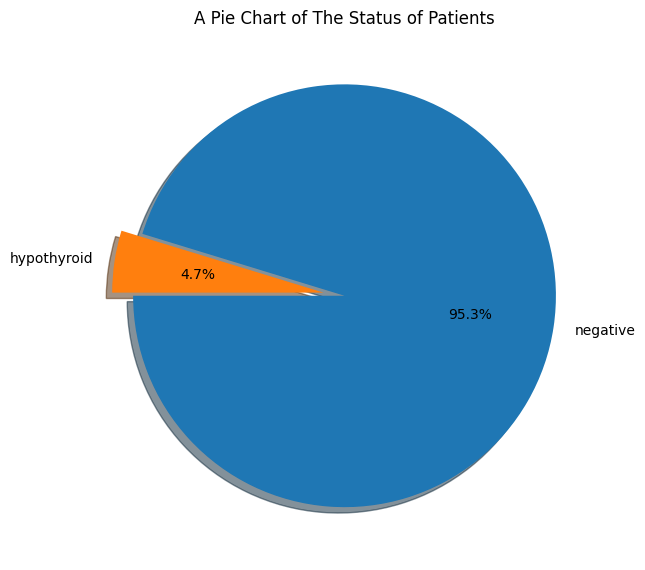

In [19]:
# A pie chart representing the number of positive and negative hypothyroid cases
accounts = df['status'].value_counts()
labels = accounts.index
values = accounts.values

plt.figure(figsize=(7,7), dpi=100)
plt.pie(values, labels = labels, autopct='%1.1f%%', explode = (0,0.1), shadow=True, startangle=180)
plt.title('A Pie Chart of The Status of Patients', color='black')
plt.show()

Most patients are negative on hypothyroid.

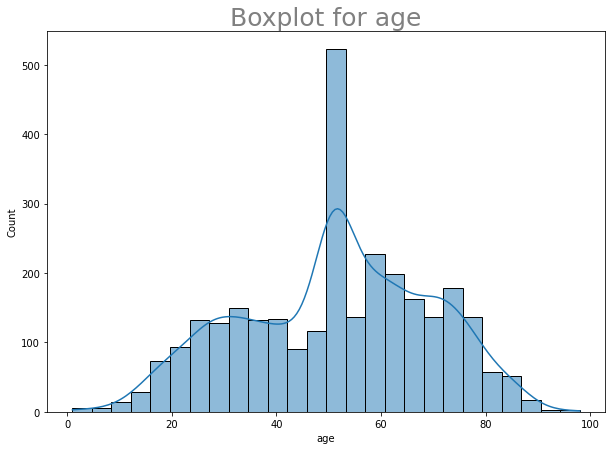

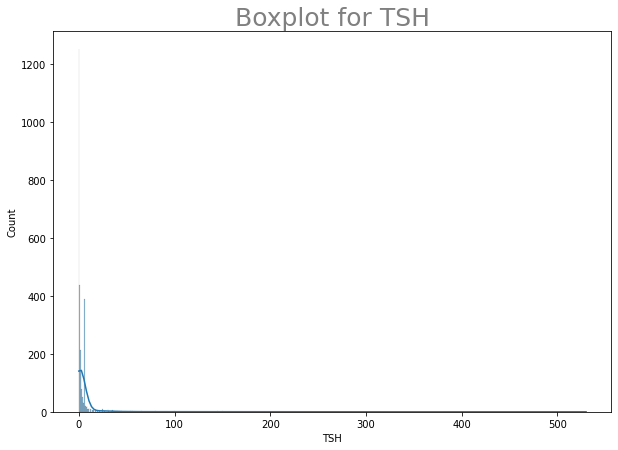

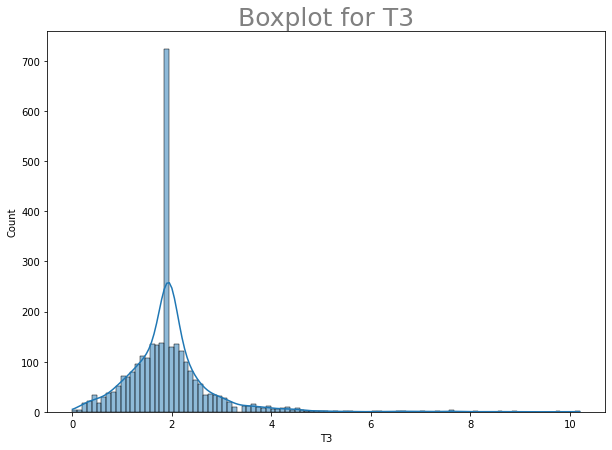

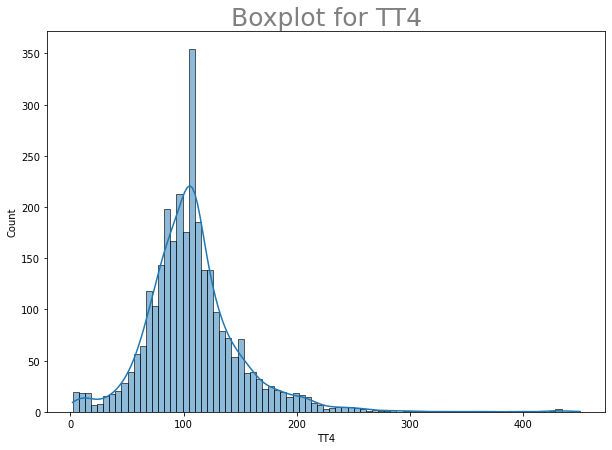

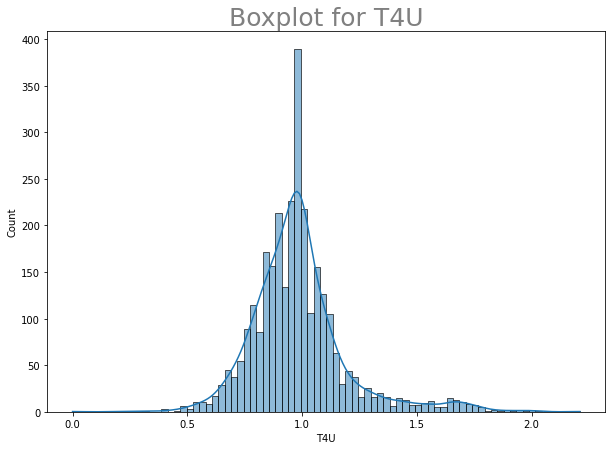

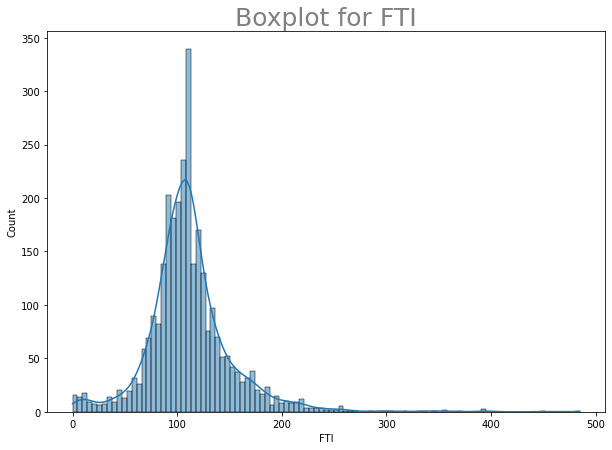

In [20]:
#Histogram of the numerical columns
for i in nullified_columns:
    plt.figure(figsize = (10,7))
    sns.histplot(df[i], kde = True)
    plt.title('Boxplot for ' + i, size = 25, color = 'grey')
            
plt.show()

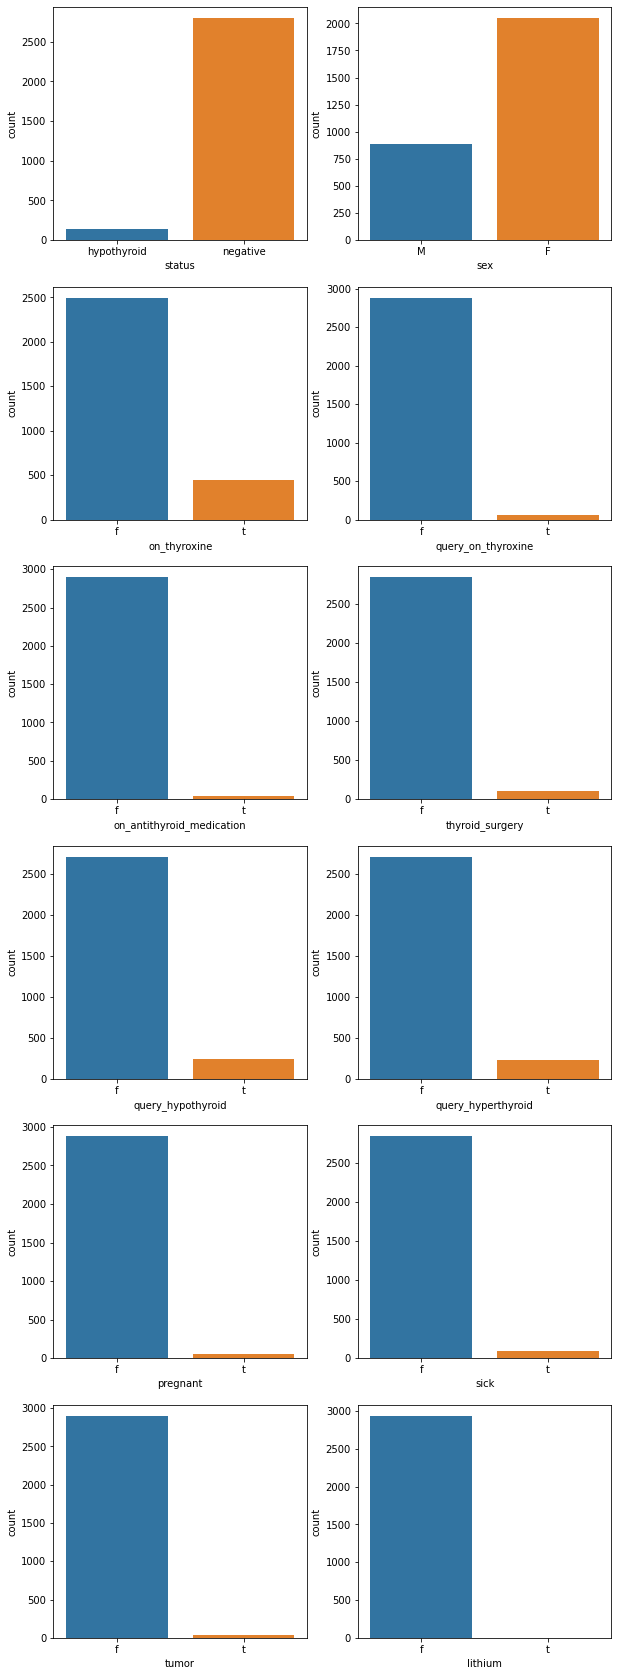

In [21]:
#Countplot of the categorial columns
categorical=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize = (10,30))
for ax, data, column in zip(axes.flatten(), df, categorical):
    sns.countplot(df[column], ax=ax)

In [22]:
#Finding the mean of the numerical columns
df[nullified_columns].mean()

age     51.377127
TSH      5.836747
T3       1.926208
TT4    108.278130
T4U      0.984740
FTI    111.724949
dtype: float64

In [23]:
#Finding the mode
df[nullified_columns].mode()

,age,TSH,T3,TT4,T4U,FTI
0,51.0,0.0,1.931367,108.426528,0.985198,111.721524


In [24]:
#Finding the median
df[nullified_columns].median()

age     51.000000
TSH      0.900000
T3       1.931367
TT4    106.000000
T4U      0.970000
FTI    109.000000
dtype: float64

In [25]:
#Finding the upper and lower quantiles
df[nullified_columns].quantile([0.25, 0.75])

,age,TSH,T3,TT4,T4U,FTI
0.25,38.0,0.0,1.5,85.0,0.86,92.0
0.75,65.0,5.0,2.2,124.0,1.06,126.0


In [26]:
#Finding the standard deviation
df[nullified_columns].std()

age    18.036434
TSH    22.709193
T3      0.862987
TT4    43.003412
T4U     0.212011
FTI    41.290571
dtype: float64

There is a high standard deviation in all variables apart from T3 and T4U.

In [27]:
#Finding the variance
df[nullified_columns].var()

age     325.312953
TSH     515.707468
T3        0.744746
TT4    1849.293417
T4U       0.044949
FTI    1704.911254
dtype: float64

There is a high variance in all columns apart from T3 and T4U

In [28]:
#Checking the skewness
df[nullified_columns].skew()

age    -0.195883
TSH    10.904475
T3      2.378070
TT4     1.535027
T4U     1.296356
FTI     1.576518
dtype: float64

The data is positively skewed apart from age

In [29]:
#Checking the kurtosis
df[nullified_columns].kurt()

age     -0.654826
TSH    172.596538
T3      14.354617
TT4      7.840411
T4U      3.941791
FTI      9.357089
dtype: float64

There are extreme values all over our data

### 6.2 Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

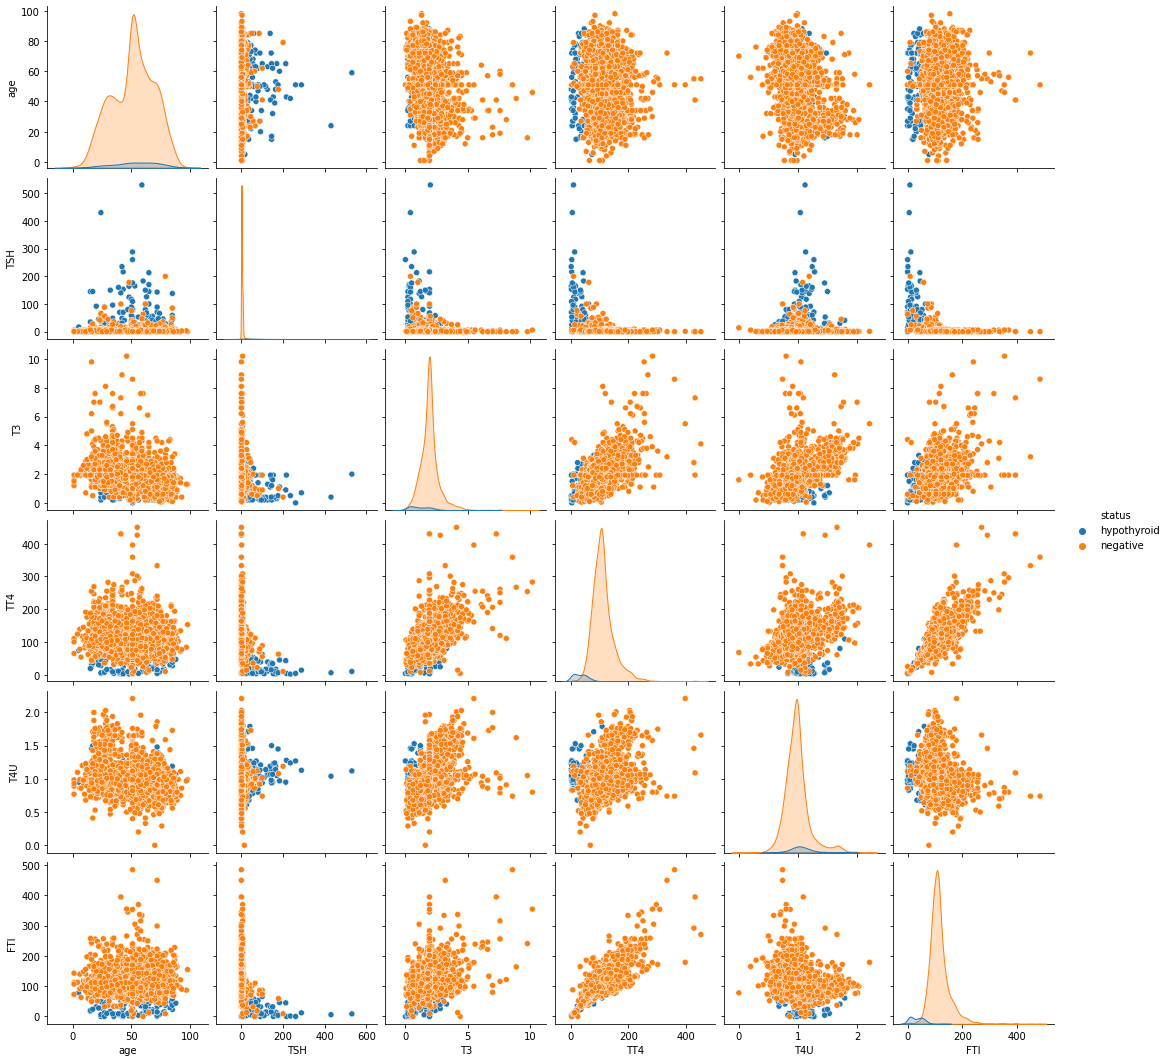

In [30]:
#Pairplot showing the relationship between the various colums
plt.figure(figsize = (20, 20), dpi=100)
sns.pairplot(df, hue = 'status')

Using the pairplot we can look at all the linear and non-linear relationships.

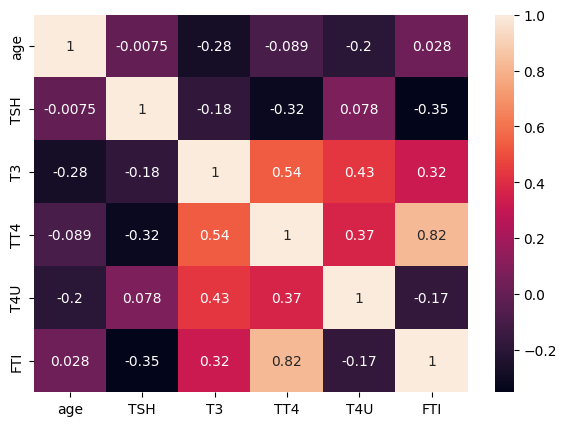

In [31]:
#Correlation
correlation = df.corr()
fig, ax = plt.subplots(figsize=(7,5), dpi = 100)
sns.heatmap(correlation, annot=True)

* There is a strong relationship between T3 and TT4
* FTI and TT4 have a very strong correlation
* T4U and T3, T3 and FTI, TT4 and T4U have a strong correlation

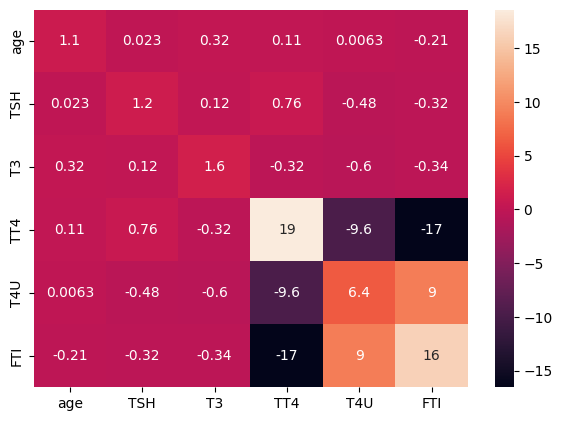

In [32]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)

# This is calculated using linear algebra inverse function
plt.figure(dpi = 100, figsize = (7,5))
sns.heatmap(pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns), annot = True)

T4U  and FTI have a high multicollinearity.

### 6.3 Multivariate Analysis

In [33]:
#Importing libraries for multivariate analysis and machine learning
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.preprocessing import StandardScaler

In [34]:
#Testing for normality
from scipy import stats
from scipy.stats import shapiro
for i in nullified_columns:
    stat, p = shapiro(df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
#interpreting
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian')
    else:
        print('Data does not look Gaussian for ', i)

Statistics=0.983, p=0.000
Data does not look Gaussian for  age
Statistics=0.230, p=0.000
Data does not look Gaussian for  TSH
Statistics=0.831, p=0.000
Data does not look Gaussian for  T3
Statistics=0.905, p=0.000
Data does not look Gaussian for  TT4
Statistics=0.903, p=0.000
Data does not look Gaussian for  T4U
Statistics=0.886, p=0.000
Data does not look Gaussian for  FTI


The dataset is not gaussian. We will have to normalize it.

In [35]:
#Applying label encoding to our dataset
from sklearn.preprocessing import LabelEncoder
data = df.apply(LabelEncoder().fit_transform)
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,161,1,7,1,22,1,108,1,19,0
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,217,1,18,1,26,1,73,1,26,0
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,60,1,0,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,233,1,5,1,8,1,64,1,9,0
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,62,1,88,1,48,0


In [36]:
# Split the independent and dependent variables
# We want to predict if someone is a social drinker, so let's use that column as our Y 
y = data['status'].values


test_features = data.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = data[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Normalizing the data
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train)  
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

In [37]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,882.000000,882.000000
mean,0.959184,0.965986
std,0.197977,0.181367
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


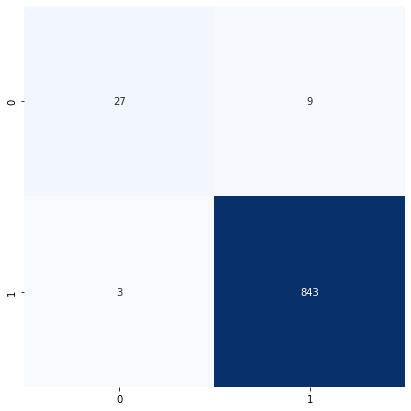

In [38]:
#We will plot a confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

870 were predicted correctly and 12 weren't predicted correctly.

In [39]:
# Model Score
print("The accuracy score of the model is: ", accuracy_score(y_test, y_pred))

The accuracy score of the model is:  0.9863945578231292


We achieve a high accuracy score of 98.63%

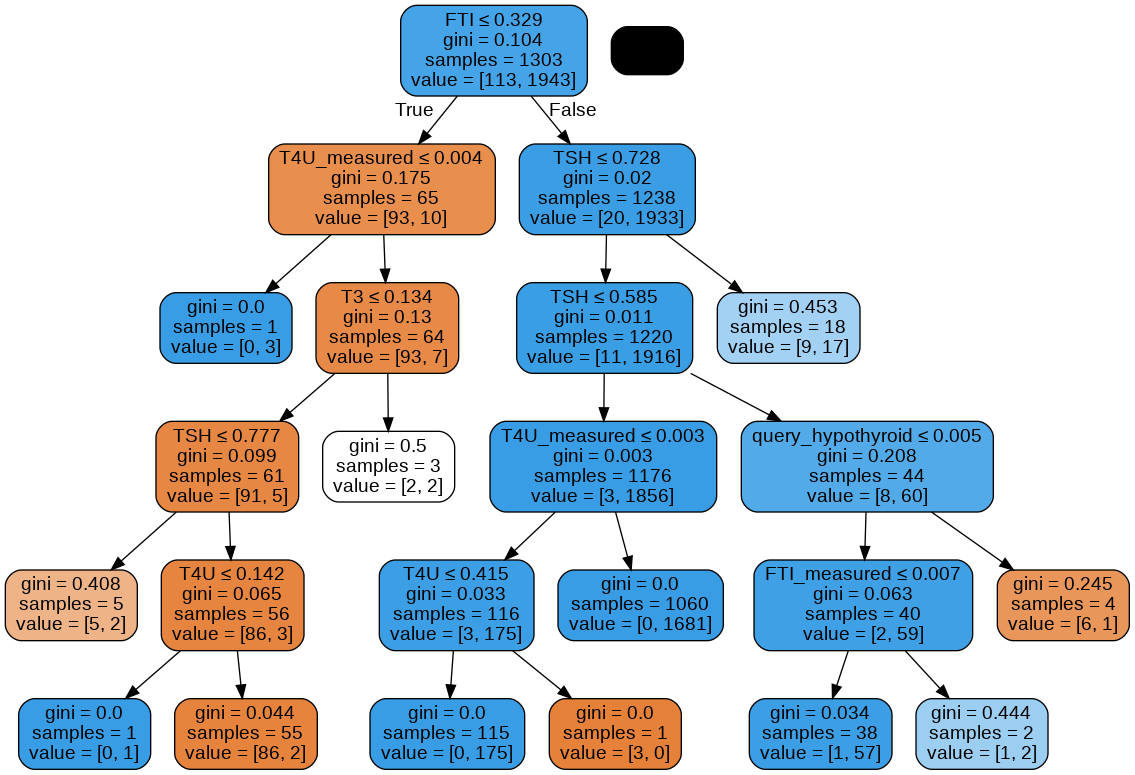

In [40]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [41]:
#Perfoming feature importance using the decision tree
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.05), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.05), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.03), ('T4U', 0.04), ('FTI_measured', 0.0), ('FTI', 0.83), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.83
Variable: query_hypothyroid    Importance: 0.05
Variable: TSH                  Importance: 0.05
Variable: T4U                  Importance: 0.04
Variable: T4U_measured         Importance: 0.03
Variable: T3                   Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_m

FTI is the most important feature. Other important features are query_hypothyroid, TSH, T4U, T4U_measured, and T3 are the most important features. We only need 6 features for our prediction.

In [42]:
#Hyperparameter tuning to find the best parameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

search = RandomizedSearchCV(estimator= forest, param_distributions={'n_estimators': sp_randint(100,1000), 'min_samples_split': np.arange(2,20),  'max_depth': sp_randint(2,10)},
                      n_jobs=1, cv = 5)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'max_depth': 8, 'min_samples_split': 7, 'n_estimators': 466}
0.9834608933928614


#### Testing the model with the best parameters

In [43]:
# min_samples_split or max_depth
forest_p = RandomForestClassifier(n_estimators = 538, random_state=42, min_samples_split = 9, max_depth=8)
forest_p = forest_p.fit(X_train, y_train)
# Predict based on the model we've trained
y_pred = forest_p.predict(X_test)

In [44]:
# Model Score
print("The accuracy score of the model is: ", accuracy_score(y_test, y_pred))

The accuracy score of the model is:  0.9863945578231292


The model has a percentage after tuning. 98.64%

## 7. Implementing the Solution

In [45]:
#Using the most important features for the models
X1 = data[['FTI', 'query_hypothyroid', 'TSH', 'T4U', 'T4U_measured', 'T3']]

### 7.1 Ada Boost Classifier

In [46]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

In [47]:
from sklearn.ensemble import AdaBoostClassifier
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostClassifier()
ada_boost = ada_boost.fit(X1_train, y_train)
y_pred_ada = ada_boost.predict(X1_test)

In [48]:
#Getting a comparison of the actual and predicted
comparison_ada = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})
comparison_ada.describe()

,Actual,Predicted
count,882.000000,882.000000
mean,0.959184,0.964853
std,0.197977,0.184257
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [49]:
# Model Score
print("The accuracy score of the model is: ", accuracy_score(y_test, y_pred_ada))

The accuracy score of the model is:  0.9875283446712018


The model has an accuracy score of 98.75%

### 7.2 Gradient Boost Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=538, min_samples_split=9, max_depth=8)
gbc = gbc.fit(X1_train, y_train)
y_pred_gbc = gbc.predict(X1_test)

In [51]:
#Getting a description of the model
comparison_gbc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gbc})
comparison_gbc.describe()

,Actual,Predicted
count,882.000000,882.000000
mean,0.959184,0.961451
std,0.197977,0.192626
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [52]:
# Model Score
print("The accuracy score of the model is: ", accuracy_score(y_test, y_pred_gbc))

The accuracy score of the model is:  0.9909297052154195


The model has an accuracy score of 99.20%

## 8. Challenging the solution

Reviewing the Solution Using SVM

### 8.1 SVM Using Polynomial

In [53]:
# Specify the input for the model
XX = df['FTI'].values.reshape(-1,1)
#splittig the data into train and test set
XX_test,XX_train,y_test,y_train=train_test_split(XX,y,test_size=0.3,random_state=42)
# Fit the model
poly = SVC(kernel= 'poly')
poly.fit(XX_train,y_train)

SVC(kernel='poly')

In [54]:
# Making predictions
predict_svc = poly.predict(XX_test)
# Model Accuracy
accuracy_score(y_test, predict_svc)

0.9771400778210116

The model has an accuracy score of 97.71%

### 8.2 RBF Kernel

In [55]:
#Using rbf kernel
rbf = SVC(kernel= 'rbf')
rbf.fit(XX_train,y_train)
# Making predictions
predict_rbf = rbf.predict(XX_test)
# Model Accuracy
accuracy_score(y_test, predict_rbf)

0.97568093385214

The model has an accuracy score of 97.56%

### 8.3 Linear Kernel

In [56]:
#Using linear kernel
linear = SVC(kernel= 'linear')
linear.fit(XX_train,y_train)
# Making predictions
predict_linear = linear.predict(XX_test)
# Model Accuracy
accuracy_score(y_test, predict_linear)

0.9747081712062257

The model has an accuracy score of 97.47%

## 9. Recommendations

For the best results, we use the model which has the highest score. In this case it is the Gradient boost classifier model.